# Parametric differential vias

This example demonstrates how a differential via pair can be created using the EDB Python
interface.

The final differential via pair is shown below.

<img src="_static/diff_via.png" width="500">

Keywords: **Differential Via**

## Prerequisites

### Perform imports

In [1]:
import os
import tempfile
import pyedb

### Define constants
Constants help ensure consistency and avoid repetition throughout the example.

In [2]:
AEDT_VERSION = "2025.2"
NG_MODE = False  # Open AEDT UI when it is launched.

In [3]:
temp_folder = tempfile.TemporaryDirectory(suffix=".ansys")

### Start the EDB

In [4]:
aedb_path = os.path.join(temp_folder.name, "diff_via.aedb")
print(f"AEDB file path: {aedb_path}")

edb = pyedb.Edb(edbpath=aedb_path, edbversion=AEDT_VERSION)

AEDB file path: C:\Users\ansys\AppData\Local\Temp\tmp8d_qkw0m.ansys\diff_via.aedb


C:\actions-runner\_work\pyaedt-examples\pyaedt-examples\.venv\lib\site-packages\pyedb\misc\decorators.py:55: UserWarning: Argument `edbversion` is deprecated for method `Edb`; use `version` instead.
  warnings.warn(
C:\actions-runner\_work\pyaedt-examples\pyaedt-examples\.venv\lib\site-packages\pyedb\generic\design_types.py:301: UserWarning: Your ANSYS AEDT version is eligible to gRPC version.You might consider switching to that version for better user experience.For more information please check this link: https://edb.docs.pyansys.com/version/dev/grpc_api/index.html
  warnings.warn(GRPC_GENERAL_WARNING, UserWarning)


PyEDB INFO: Star initializing Edb 10:22:30.028826


PyEDB INFO: Edb version 2025.2


PyEDB INFO: Logger is initialized. Log file is saved to C:\Users\ansys\AppData\Local\Temp\pyedb_ansys.log.


PyEDB INFO: legacy v0.67.1


PyEDB INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyEDB INFO: create_edb completed in 8.6949 seconds.


PyEDB INFO: EDB C:\Users\ansys\AppData\Local\Temp\tmp8d_qkw0m.ansys\diff_via.aedb created correctly.


PyEDB INFO: EDB initialization completed in 9.9197 seconds.


## Model Creation

### Add stackup layers

A stackup can be created layer by layer or imported from a 
[configuration file](https://examples.aedt.docs.pyansys.com/version/dev/examples/edb/use_configuration/import_stackup.html).

In [5]:
edb.stackup.add_layer("GND")
edb.stackup.add_layer("Diel", "GND", layer_type="dielectric", thickness="0.1mm", material="FR4_epoxy")
edb.stackup.add_layer("TOP", "Diel", thickness="0.05mm")

### Create signal nets and ground planes
Create a signal net and ground planes.

In [6]:
points = [[0.0, 0], [100e-3, 0.0]]
edb.modeler.create_trace(points, "TOP", width=1e-3)
points = [[0.0, 1e-3], [0.0, 10e-3], [100e-3, 10e-3], [100e-3, 1e-3], [0.0, 1e-3]]
edb.modeler.create_polygon(points, "TOP")
points = [[0.0, -1e-3], [0.0, -10e-3], [100e-3, -10e-3], [100e-3, -1e-3], [0.0, -1e-3]]
edb.modeler.create_polygon(points, "TOP")

## Place vias

In [7]:
edb.padstacks.create("MyVia")
edb.padstacks.place([5e-3, 5e-3], "MyVia")
edb.padstacks.place([15e-3, 5e-3], "MyVia")
edb.padstacks.place([35e-3, 5e-3], "MyVia")
edb.padstacks.place([45e-3, 5e-3], "MyVia")
edb.padstacks.place([5e-3, -5e-3], "MyVia")
edb.padstacks.place([15e-3, -5e-3], "MyVia")
edb.padstacks.place([35e-3, -5e-3], "MyVia")
edb.padstacks.place([45e-3, -5e-3], "MyVia")

PyEDB INFO: Padstack MyVia create correctly


### View the nets

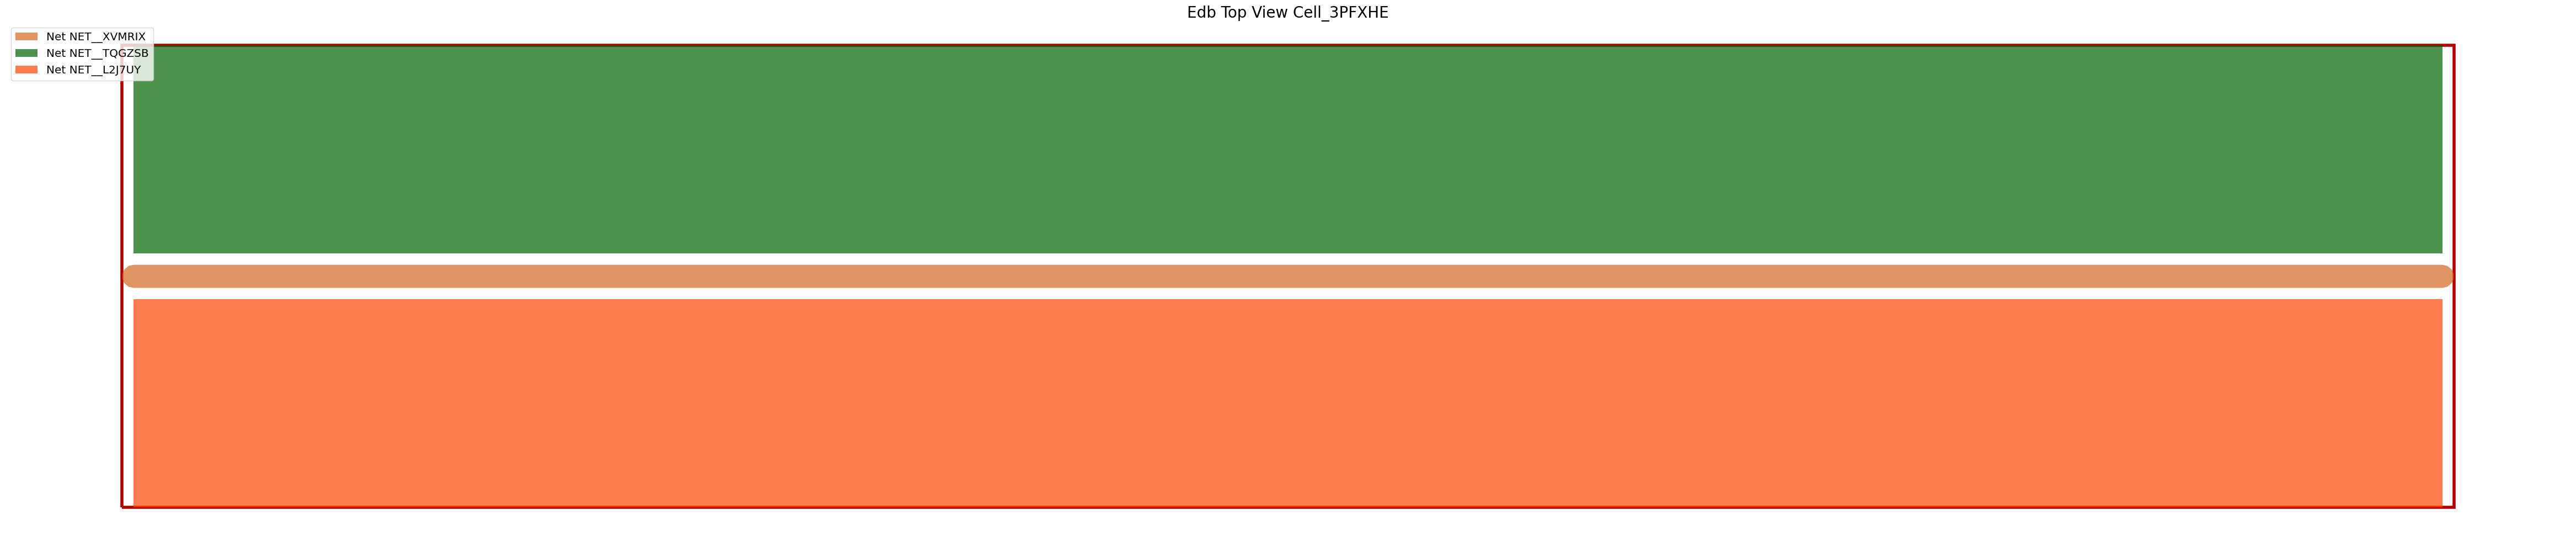

PyEDB INFO: Plot Generation time 0.285


(<Figure size 6000x3000 with 1 Axes>,
 <Axes: title={'center': 'Edb Top View Cell_3PFXHE'}>)

In [8]:
edb.nets.plot(None, color_by_net=True)

### View the stackup

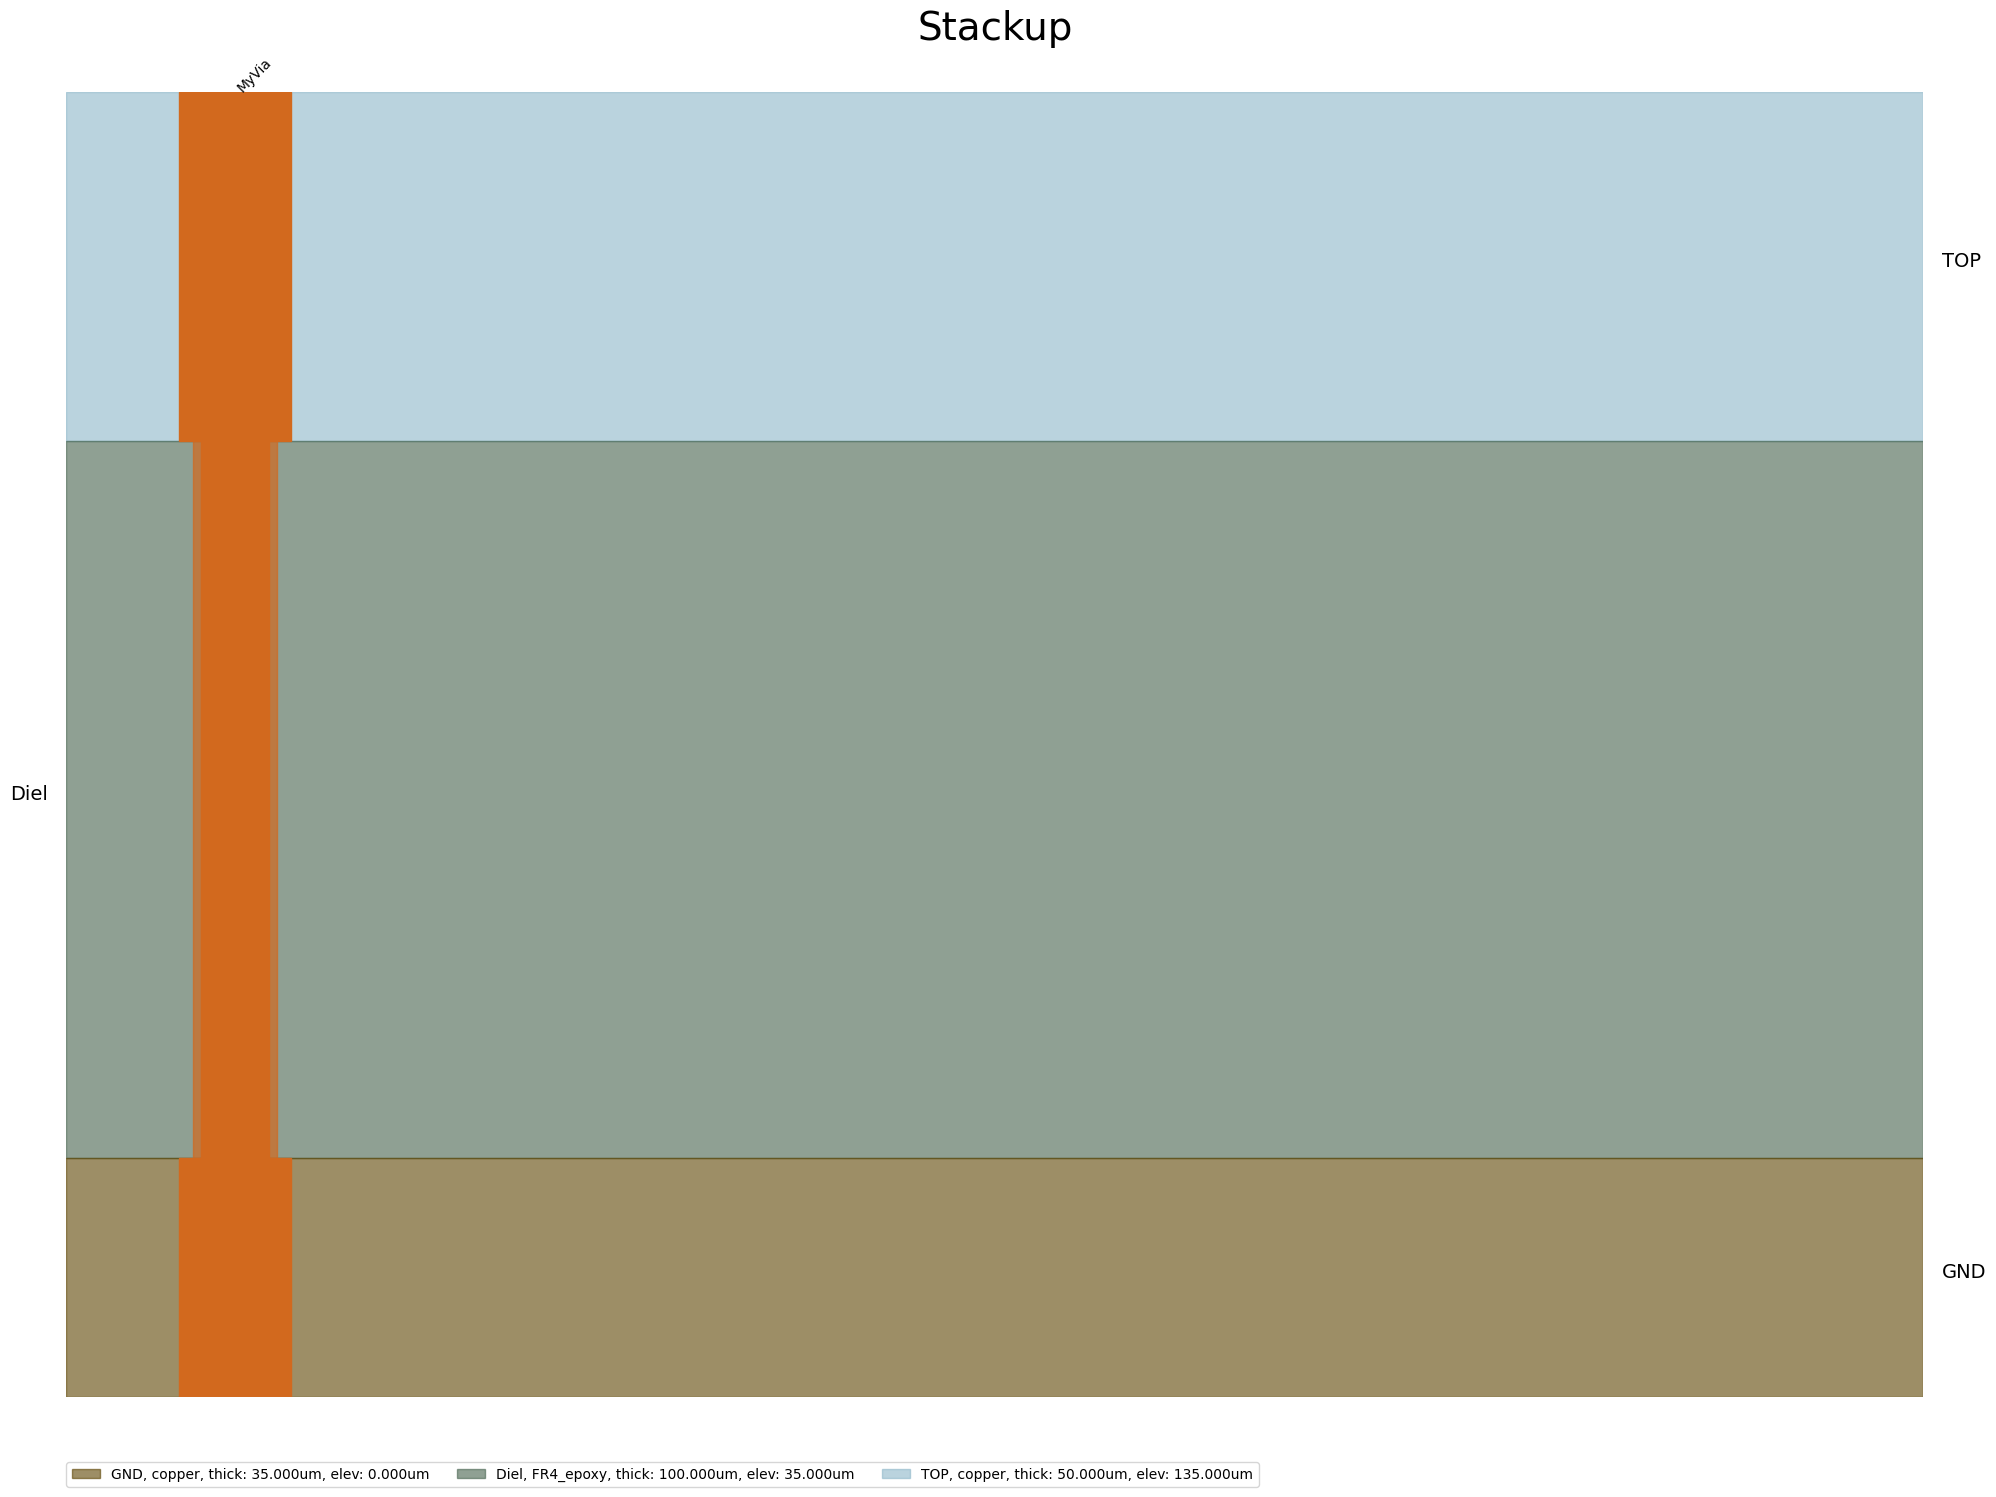

<module 'matplotlib.pyplot' from 'C:\\actions-runner\\_work\\pyaedt-examples\\pyaedt-examples\\.venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [9]:
edb.stackup.plot(plot_definitions="MyVia")

## Finish

### Save the project
Save and close EDB.

In [10]:
if edb:
    edb.save_edb()
    edb.close_edb()
print("EDB saved correctly to {}. You can import in AEDT.".format(aedb_path))

PyEDB INFO: Save Edb file completed in 0.0000 seconds.


PyEDB INFO: Close Edb file completed in 0.0098 seconds.


EDB saved correctly to C:\Users\ansys\AppData\Local\Temp\tmp8d_qkw0m.ansys\diff_via.aedb. You can import in AEDT.


### Clean up

All project files are saved in the folder ``temp_folder.name``.
If you've run this example as a Jupyter notebook, you
can retrieve those project files. The following cell
removes all temporary files, including the project folder.

In [11]:
temp_folder.cleanup()